# Analysis for the Zeeman Effect

In [1]:
# Run this cell with Shift-Enter, and wait until the asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as up
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Summary of tasks

### Prior to working on this notebook

Make sure you understand the concept of the <i>free spectral range</i> and the general idea of how to obtain a wavelength or energy shift from the Zeeman spectrum data.

Calculate the $g$ factors and the energys shifts $\Delta E_m$ for the three different Hg transitions studied: the 541 nm green line, and the two yellow lines, 577 nm and 579 nm.  Your energy shift predictions should be in units of $\mu_BB$.

You will need the above calculations to check against the measures and analyzed values.

### Tasks for this notebook

**Before analyzing the scans**

Read in the Fabry-Perot mirror position data.  Calculate the mirror spacing and the free spectral range in units of hertz.

Based on the magnet calibration curve coefficients, create a magnet calibration function that converts magnet current (in amperes) to magnetic field (in tesla).  Your calibration should propagate the uncertainty in the current to the uncertainty in the B-field.

Combine the magnetic field $B$ with the Bohr magneton $\mu_B$ to obtain an energy unit $\mu_BB$ for the green line with non-zero magnetic field (typically taken with magnet current about 3.6 A) and for the yellow lines with non-zero filed (typically about 1.8 A).  This unit sets the scale for the magnetic energy. HINT: use the value of $\mu_B$ in Hz/T.  Then you don't need to convert FSR to actual energy units.

**For the green lines**

Read in two data files for green: $I=0$ and $I\neq0$ with no polarizer.  Trim the data sets to cut off partial patterns and the reset portion.  Plot the two data sets on a single graph, vertically separated and scaled so that the scans can be easily compared by eye.  The x axis can be the array index.

Analyze the $I=0$ data set as follows:

1. Smooth the data set with SciPy `gaussian_filter1d()`.  Use minimal gaussian width to preserve scan detail.
2. Locate the central peaks of each cycle, using the SciPy `find_peaks()` function.  From the return result of `find_peaks()` determine the average FWHM (units of array index) and the average separation of the peaks.  Plot this in a way that shows the measured widths and peak positions. 
3. The ratio of the average separation to the FWHM gives the instrument <i>finesse</i>.  Calculate this.

Analyze the $I\neq0$ scan with no polarizer, as follows:

1. Smooth the data set with SciPy `gaussian_filter1d()`.  Use minimal gaussian width (e.g, 2 to 4) to preserve scan detail.
2. Apply the `find_peaks()` function to all of the prominent peaks in the scan.  There should be 9 peaks per cluster for a total of 36 identified peaks.  Plot the data with markers to locate the identified peak positions to check that you got the correct peaks.
3. Locate the central peaks of each cycle.  These peaks will be used to calibrate the scan.  They can be accessed from the `peaks` array returend by `find_peaks()` with a slice that starts with the first central peak (e.g., at index 4) and skips by the number of peaks between the first central peak and the second central peak (e.g., by 9).  For example `peaks[4::9]` would grab the locations of the central peaks as described.
4. Number the central peak positions sequentially (first central peak is 1, second is 2, etc.). Plot and fit the peak number versus the measured position with a 3rd order polynomial.  This will create a nonlinear calibration function that converts the array indices to units of the free spectral range, and it corrects for the hysteresis in Fabry-Perot scan.
5. Replot the scan in terms of free-spectral-range units.  It should look more uniform along the x axis.  You will need to generate an x-axis array that has the same indices as the scan array.
6. Convert the peak locations to units of the free spectral range (FSR).  Create a table (DataFrame table is nice) that lists the 36 peak positions in terms of `peaks` number and FSR.  Check that the central peaks are located at FSR units of 1.0, 2.0, etc. (or very close).
7. Calculate the separation between each satellite peak and its associated central peak.  Combine the separation values for the same satellite from each cluster to make an average separation from the center for that satellite. For example in the first cluster, there is a satellite immediately to the left, separated by a certain distance.  In every other cluster there is the same satellite with the same separation.  Combine the separations from all of these to get the average separation for that satellite.  These separations will all be in units of the free spectral range, and be fractions (positive and negative) of the free spectral range.
8. Convert the separations in FSR units to separations in $\mu_BB$ energy units.  You will need a conversion factor based on how many of $\mu_BB$ fit into one FSR.
9. Finally make a table that lists the separations in terms of satellite number, separation in FSR, and separation in $\mu_BB$, and include a column of the theoretical separation in units of $\mu_BB$ to compare. 

**For the yellow lines**

Read in two data files for yellow: $I=0$ and $I\neq0$ with no polarizer.  Trim the data sets to cut off partial patterns and the reset portion.  Plot the two data sets on a single graph, vertically separated and scaled so that the scans can be easily compared by eye.  The x axis can be the array index.  (It is helpful to align the central peaks from the two scans to identify wich peaks are from 577 nm and which are from 579 nm.)

Analyze the $I\neq0$ scan with no polarizer in the same way as above for steps 1 & 2.  There will be about 24 total peaks.

Then, separate the peak sets into two groups, one group of about 12 peaks will correspond to the 577 nm line, and the other (about) 12 will correspond to the 579 nm line.  These groups must be analyzed separately.  For each group, follow the plan of steps 3 through 9, except you will have clusters of 3 peaks instead of 9 peaks to sort out.



## Free spectral range

Calculate the free spectral range of the Fabry-Perot etalon in hertz (Hz), and print it out in gigahertz (GHz).  The formula is

$$\text{FSR} = \frac{c}{2d}$$

where $d$ is the mirror separation, and $c$ is the speed of light.

In [2]:
## Read in the mirror positions

Mirror_sep = pd.read_csv("Fabry-Perot Measurements.csv") 

## Calculate the differences
d_array = abs(Mirror_sep["RightMirror(mm)"] - Mirror_sep["LeftMirror(mm)"])

## Calculate then mean value of the differences and the 
## standard deviation of the mean of the differences.
## Convert values to meters
d = np.mean(1.9) * 10 **-3
sigma_d = np.std(d_array) * 10 **-3

## make an uncertainty object
ud = unc.ufloat(d,0)

## Calculate the free spectral range in Hz 
## Use the scipy constants "const.c"

uFSR = const.c/(2*ud)

## Print out the mirror separation and the FSR
print('Mirror separation: {:.2uP} mm'.format(ud/const.milli))
print('Free spectral Range: {:.2uP} GHz'.format(uFSR/const.giga))

Mirror separation: 1.9±0 mm
Free spectral Range: 78.89275210526316±0 GHz


C:\Users\juila\anaconda3\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


## Magnetic Field

In [3]:
# Coefficiants from fit to magnetic field data come from from instructions 
coeffs = np.array([-9.4193, 33.446, 375.66, 42.845]) # values give millitesla

# poly1d() creates a polynomial function
#
# Convert coefficients to give field in tesla with 'const.milli'
B_coeff = coeffs * const.milli
B = np.poly1d(B_coeff)
print(B)

           3           2
-0.009419 x + 0.03345 x + 0.3757 x + 0.04285


In [4]:
# Green peaks current & field
I_green = np.mean([3.13, 3.75, 3.77]) # current in green line measurement, Amps
sigma_I_green = 0.05 # Amps

# Make uncertainty object
unc_I_green = unc.ufloat(I_green,sigma_I_green)

B_green = B(unc_I_green)

print('Field strength at {:.1uP} A = {:.2uP} mT'.format(unc_I_green,B_green/const.milli))

Field strength at 3.55±0.05 A = 1377±13 mT


In [5]:
# Yellow peaks current & field

I_yellow = 1.3000 # current in green line measurement, Amps
sigma_I_yellow = 0.0005 # Amps

# Make uncertainty object
unc_I_yellow = unc.ufloat(I_yellow,sigma_I_yellow)

B_yellow = B(unc_I_yellow)

print('Field strength at {:.1uP} A = {:.2uP} mT'.format(unc_I_yellow,B_yellow/const.milli))

Field strength at 1.3000±0.0005 A = 567.03±0.21 mT


### Conversion factors

Under the SciPy constants, one can obtain the Bohr magneton in unist of Hz/T.  This allows $\mu_BB$ to be expressed in frequency units, which are the same units as the FSR.

In [6]:
print('mu_B = {:.6g} Hz/T'.format(const.value(u'Bohr magneton in Hz/T')))
mu_B = const.value(u'Bohr magneton in Hz/T')

mu_B = 1.39962e+10 Hz/T


Create conversion factors to convert FSR units to units of $\mu_BB$.  These will be used later.

In [7]:
conv_fact_green = uFSR/(mu_B*B_green)
print('Conversion factor for green lines (Free spectral range in units of B*mu_B): {:.1uP}'.format(conv_fact_green))

conv_fact_yellow = uFSR/(mu_B*B_yellow)
print('Conversion factor for yellow lines (Free spectral range in units of B*mu_B): {:.1uP}'.format(conv_fact_yellow))

Conversion factor for green lines (Free spectral range in units of B*mu_B): 4.09±0.04
Conversion factor for yellow lines (Free spectral range in units of B*mu_B): 9.941±0.004


## Green Line Analysis

### Read in the data


In [8]:
# skiprows skips header information that is produced by the oscilloscope

# Collect the data sets into dataframes. Use the example below, which includes the current as part of the file name
Green_B0 = pd.read_csv('green_mag0_noP.csv', skiprows=15, index_col = 0) 
Green_313 = pd.read_csv('green_mag3.13_noP.csv', skiprows=15, index_col = 0) 
Green_375 = pd.read_csv('green_mag3.75_vert.csv', skiprows=15, index_col = 0)
Green_377 = pd.read_csv('green_mag3.77_horiz.csv', skiprows=15, index_col = 0)


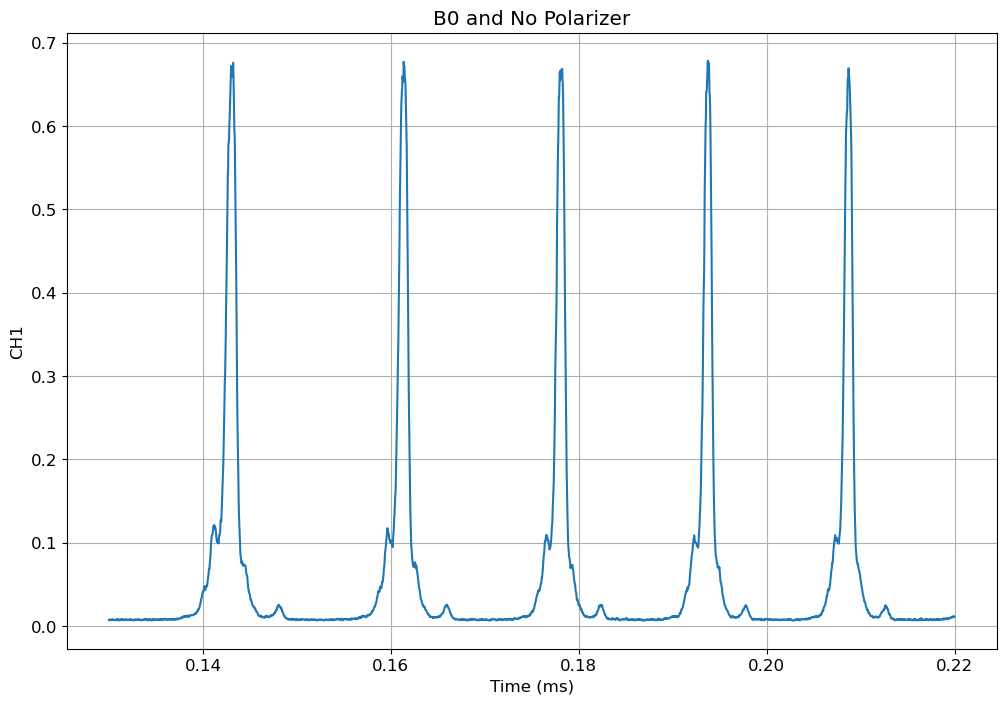

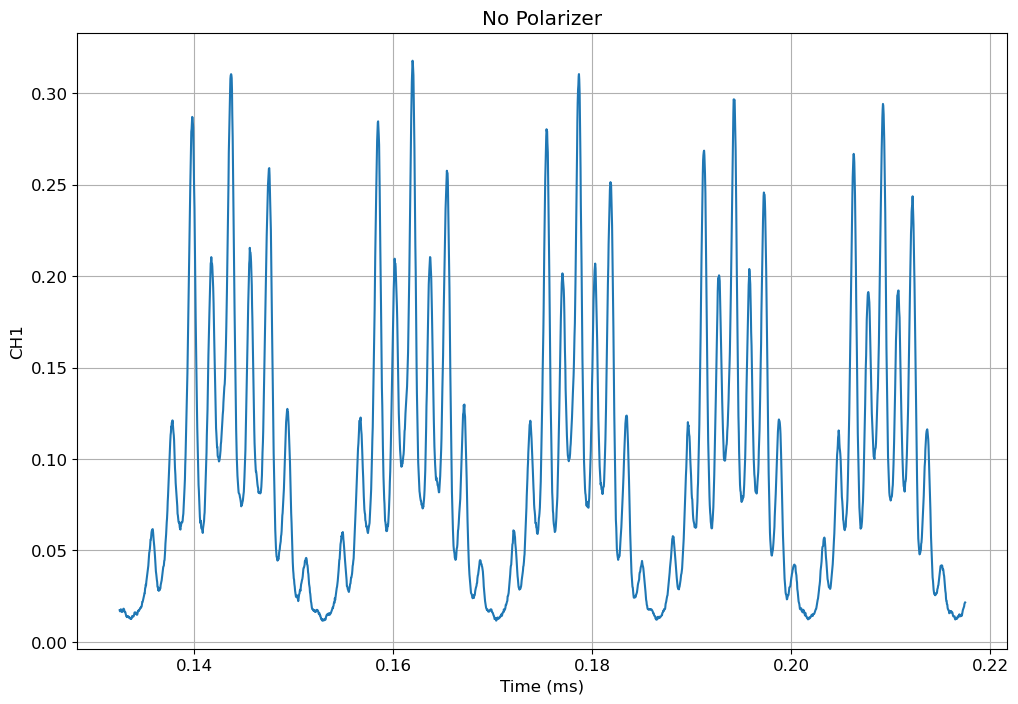

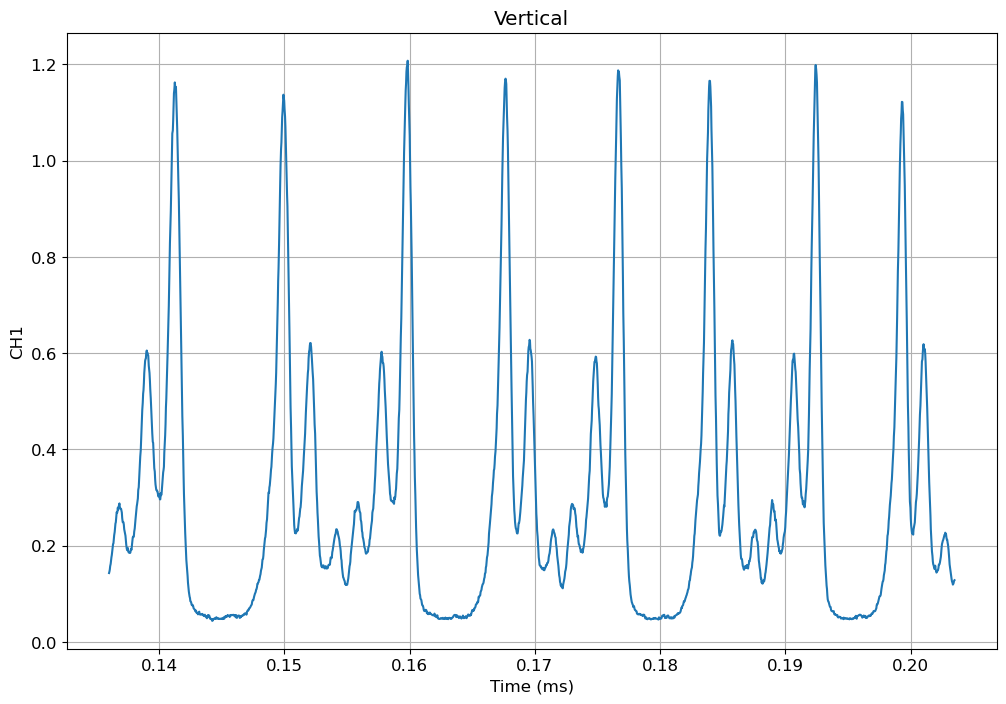

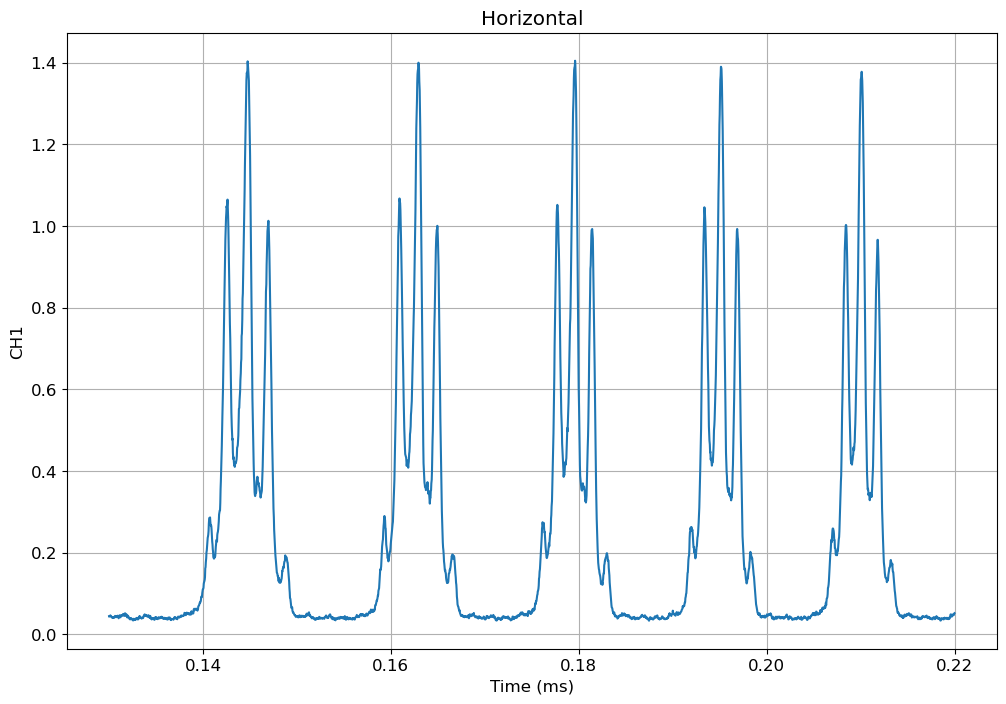

In [9]:
# Use base library to set up plot size and default font size
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 12.0,8.0  # Roughly 12 cm wde by 8 cm high
mpl.rcParams['font.size'] = 12.0 # Use 12 point font

#GreenB0 and no polarizer
plt.title("B0 and No Polarizer")
plt.xlabel("Time (ms)")
plt.ylabel("CH1")
plt.grid(True)
plt.plot(Green_B0.loc[0.13:0.22])
plt.show()

#Green313 no polarizer
plt.title("No Polarizer")
plt.xlabel("Time (ms)")
plt.ylabel("CH1")
plt.grid(True)
plt.plot(Green_313.loc[0.1325:0.2175])
plt.show()

#Green375 Vertical
plt.title("Vertical")
plt.xlabel("Time (ms)")
plt.ylabel("CH1")
plt.grid(True)
plt.plot(Green_375.loc[0.136:0.2035])
plt.show()

#Green377 Horizontal
plt.title("Horizontal")
plt.xlabel("Time (ms)")
plt.ylabel("CH1")
plt.grid(True)
plt.plot(Green_377.loc[0.13:0.22])
plt.show()

### Normalize the data sets

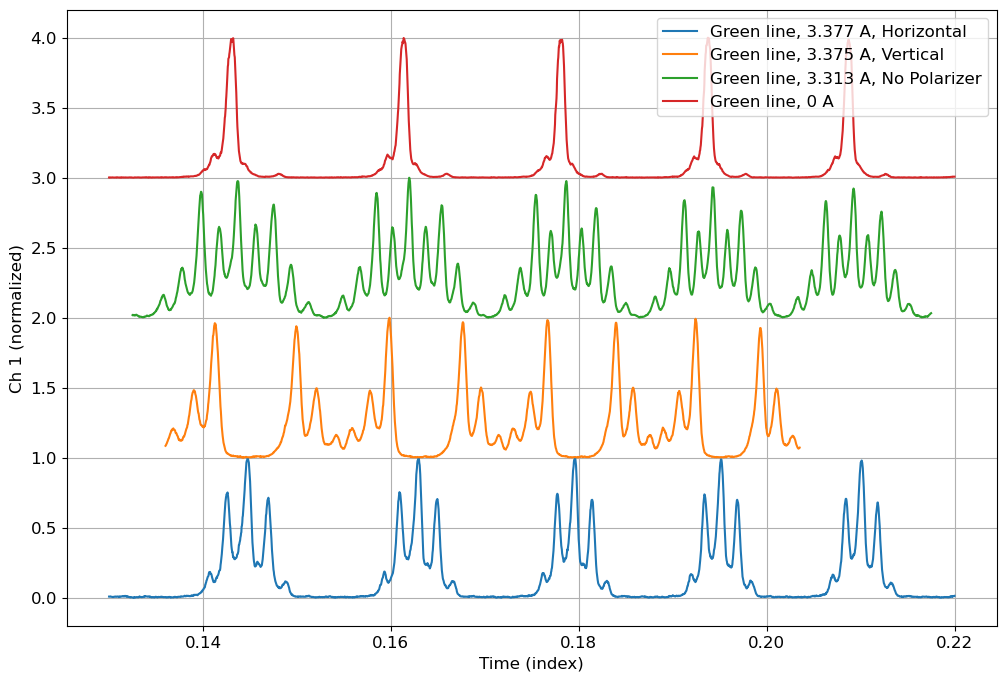

In [10]:
# Build normalized and trimmed data: normalize-scale and slice the data sets
# Slice found by eye with iteration on plot
# Put into new numpy array to reset indices to start at zero

def normalize_array(ydata):
    '''
    Normalizes data set to lie within [0,1] range
    '''
    normed_data = (ydata - ydata.min())/(ydata.max() - ydata.min())
    return normed_data

## Make sure you have a clean slice, then normalize and save
gr_B0 = normalize_array(Green_B0.loc[0.13:0.22])
gr_B313 = normalize_array(Green_313.loc[0.1325:0.2175])
gr_B375 = normalize_array(Green_375.loc[0.136:0.2035])
gr_B377 = normalize_array(Green_377.loc[0.13:0.22])


## Then plot

plt.xlabel(r'Time (index)')
plt.ylabel(r'Ch 1 (normalized)')
## Offsets gr_0

plt.plot(gr_B377,'-', label='Green line, 3.377 A, Horizontal')
plt.plot(1.0+gr_B375,'-', label='Green line, 3.375 A, Vertical')
plt.plot(2.0+gr_B313,'-', label='Green line, 3.313 A, No Polarizer')
plt.plot(3.0+gr_B0,'-', label='Green line, 0 A')
plt.legend() 
plt.grid(); 
plt.show()

### Green, no magnet current

In [11]:
## Function to locate the peaks, plot them, and return the important data
from scipy.signal import find_peaks

## function to smooth data with gaussian convolution.
from scipy.ndimage import gaussian_filter1d

def find_and_plot_peaks(ydata, title='Data', makeplot=True, min_width=50, min_dist=200, rel_prom=0.5, smoothing=2):
    '''
    Function locates peaks using SciPy.signal find_peaks() and plots
    the results (optionally).  Returns two arrays: 'peaks' which holds
    the index of each peak maximum and 'widths' which holds the FWHM of
    each peak.
    '''
    # Below does the work.  The prominence parameter 'rel_prom' makes the function only look 
    # for peaks higher than halfway up the tallest peak.
    
    smooth_data = gaussian_filter1d(ydata,smoothing)

    peaks, pk_props = find_peaks(smooth_data, width = min_width, distance=min_dist, prominence=ydata.max()*rel_prom)

    ix = 0
    print('Peak  Loc   Width   Height')
    for pk, prop in zip(peaks, pk_props['widths']): 
        ix += 1
        print('{:3d}  {:4d} {:7.1f}  {:6.2f}'.format(ix, pk, prop, ydata[pk]))

    if makeplot:
        plt.grid()
        plt.title('Peak finding for '+title)
        plt.ylabel(r'Intensity (normalized)')
        plt.xlabel(r'Array index')
        plt.plot(ydata,'-',label='Data')
        plt.plot(peaks, ydata[peaks],'o', color='C1', label='Locations')
        plt.hlines(y=pk_props['width_heights'], xmin=peaks-pk_props['widths']/2, 
                   xmax=peaks+pk_props['widths']/2, color = 'C3', label='Widths')
        plt.legend()
        plt.show()
    
    return peaks, pk_props['widths']

Peak  Loc   Width   Height
  1   411    37.6    0.97
  2   981    34.2    0.99
  3  1502    32.3    0.98
  4  1993    30.5    1.00
  5  2460    30.8    0.99


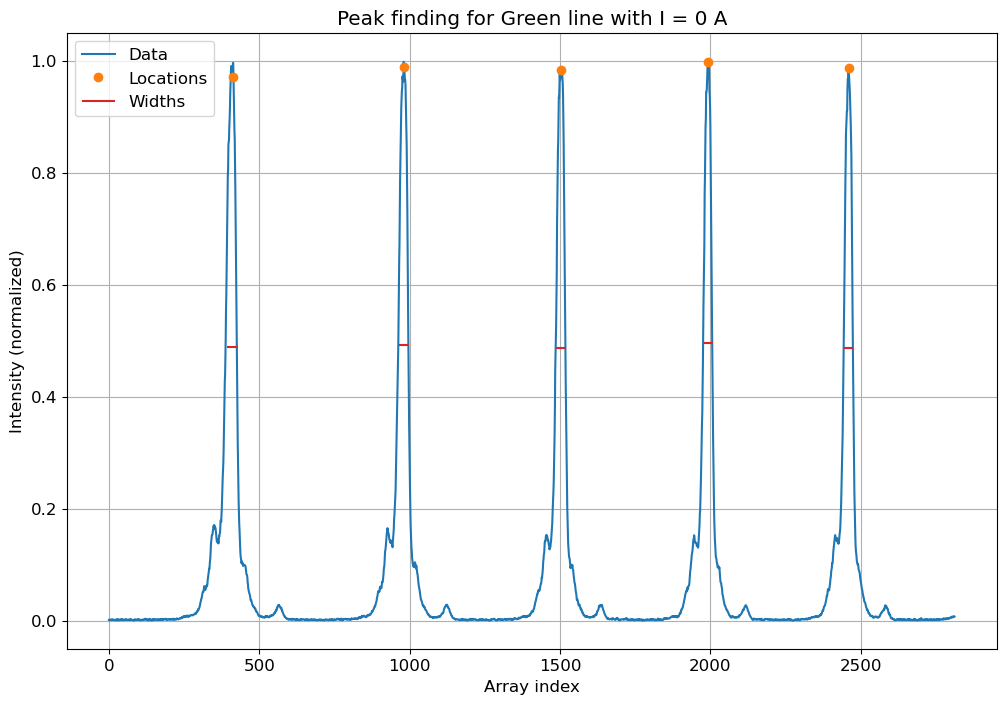

In [12]:
# Smoothing function applied to improve peak-center location

gr_B0_array = gr_B0.values.flatten()

peaks_B0,widths_B0 = find_and_plot_peaks(gr_B0_array, min_width=10, 
                                         min_dist=50, title='Green line with I = 0 A')


### Find the average peak spacing


In [13]:
from lmfit.models import LinearModel

line = LinearModel()

def model_fit_and_plot(xdata, ydata, xerr = None, yerr = None, model=LinearModel(), xlabel = 'X', ylabel = 'Y', show = True):
    '''
    Fit a line or curve, and plot/show the fit results.
    The function returns a parameters object with the fit parameters
    '''
    # Complete the function
    
    param_guess = model.guess(ydata, x=xdata)
    if (yerr is None):
        model_fit = model.fit(ydata, param_guess, x=xdata)
    else:
        model_fit = model.fit(ydata, param_guess, x=xdata, weights=1/yerr)
    if show==True:
        print(model_fit.fit_report(show_correl=False))
        model_fit.plot()
        plt.xlabel(xlabel)
        plt.ylabel(ylabel);
        plt.show()
        
    return model_fit.params

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 5
    # variables        = 2
    chi-square         = 4043.20000
    reduced chi-square = 1347.73333
    Akaike info crit   = 37.4767691
    Bayesian info crit = 36.6956449
    R-squared          = 0.99845399
[[Variables]]
    slope:      511.000000 +/- 11.6091918 (2.27%) (init = 511)
    intercept: -63.6000000 +/- 38.5033332 (60.54%) (init = -63.6)


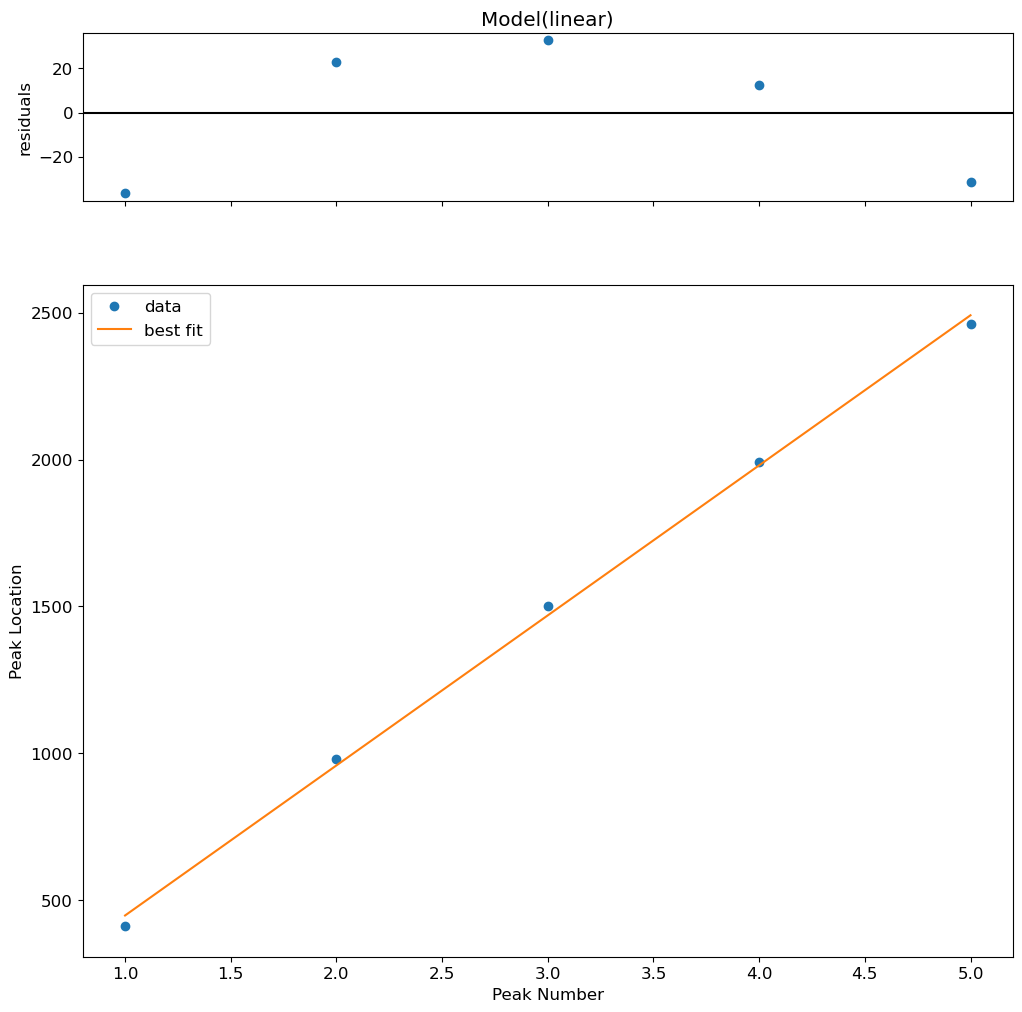

In [14]:
## Call model_fit_and_plot()
## You will need a list of whole numbers from 1 to the number of peaks as the x-axis

gr0_line = model_fit_and_plot(np.arange(1, len(peaks_B0) + 1), peaks_B0,
                              xlabel = "Peak Number", ylabel = "Peak Location")

From the fit, calculate the average peak spacing and the instrument finesse.

In [15]:
##  Building uncertainty objects allows for statistical uncertainty in the finesse.
separation = []
i = 0

#Calculate and arrange the separations
while i < len(peaks_B0) - 1:
    sep = peaks_B0[i+1] - peaks_B0[i]
    separation.append(sep)
    i+=1

#Make uncertainty objects
ave_separation = unc.ufloat(np.mean(separation), np.std(separation))
ave_width = unc.ufloat(np.mean(widths_B0), np.std(widths_B0))
print(ave_separation)
print(ave_width)
print('\nEXERCISE 1: FROM ANALYSIS OF GREEN LINE WITH I=0')
print('Instrument finesse = {:.3uP}'.format(ave_separation/ave_width))

(5.1+/-0.4)e+02
33.1+/-2.6

EXERCISE 1: FROM ANALYSIS OF GREEN LINE WITH I=0
Instrument finesse = 15.48±1.69


## Green line with field on

Now find the peaks in the scan with $I\ne0$.  There are 9 good ones in each cycle.  You will need to adjust the minimum height parameter or prominence parameter in order to get the small ones.

Peak  Loc   Width   Height
  1   103    20.7    0.16
  2   165    20.8    0.35
  3   228    24.2    0.90
  4   288    19.9    0.65
  5   350    29.4    0.98
  6   410    20.2    0.66
  7   469    23.3    0.81
  8   527    20.8    0.38
  9   585    20.6    0.11
 10   700    18.8    0.16
 11   756    19.3    0.36
 12   812    22.1    0.89
 13   865    17.9    0.64
 14   921    26.4    1.00
 15   975    18.9    0.65
 16  1028    21.4    0.80
 17  1082    19.1    0.38
 18  1133    18.8    0.11
 19  1239    16.7    0.16
 20  1290    18.0    0.36
 21  1342    21.0    0.87
 22  1392    16.8    0.62
 23  1442    26.3    0.97
 24  1493    18.0    0.63
 25  1542    20.7    0.78
 26  1592    19.2    0.37
 27  1641    17.8    0.11
 28  1739    16.4    0.15
 29  1786    16.4    0.35
 30  1835    20.5    0.84
 31  1883    16.4    0.62
 32  1930    26.2    0.93
 33  1979    17.7    0.62
 34  2025    19.7    0.76
 35  2072    18.7    0.36
 36  2119    18.8    0.10
 37  2213    16.5    0.15
 38  2259  

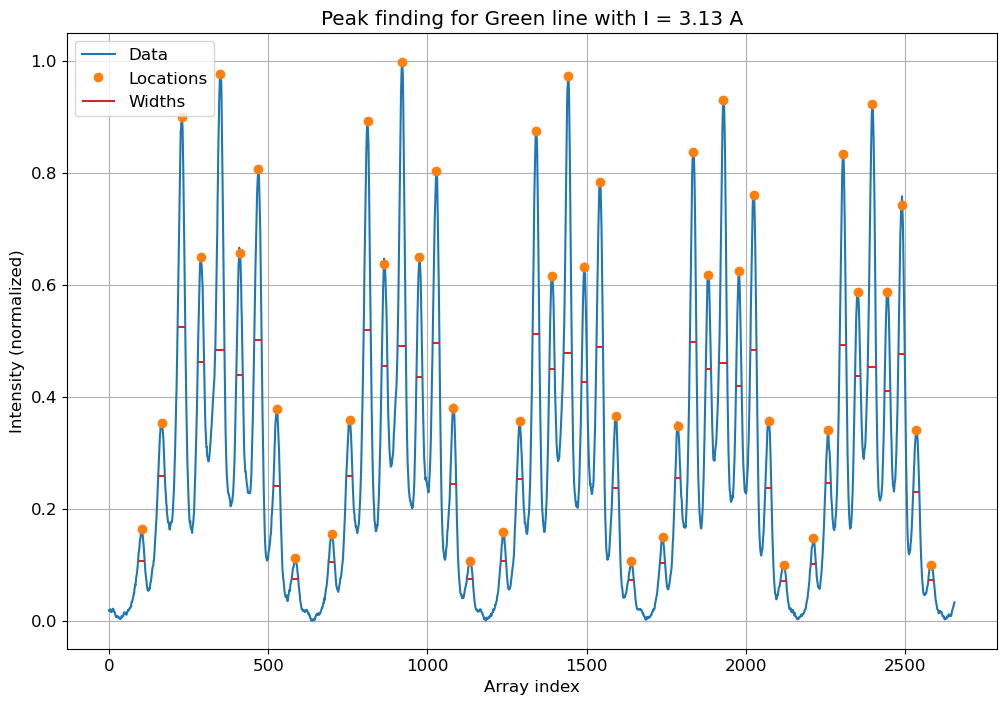

In [16]:
## Call the peak finding routine with the other data set.

gr_B313_array = gr_B313.values.flatten()

peaks_B313,widths_B313 = find_and_plot_peaks(gr_B313_array, min_width=10,
                                   min_dist=10, rel_prom = 0.05, title='Green line with I = 3.13 A')

### Create nonlinear calibration

First select the central peak locations in each cluster.  Do this with a slice, i.e., `centrals = peaks[4::9]`. This grabs from the array peaks 4,13,22, and 31, that is it skips by 9 staring at 4. Check the numbers against the plot to make sure they look right. 

Then fit the peak numbers (1,2,3,4) against the locations with a polynomial of degree 3.  Each number represents a change in energy by one FSR.  If for some reason you have only 3 cycles, use a quadratic (degree 2) polynomial.

In [17]:
## Locate the central peaks in the `peaks` array and print them.

centrals = peaks_B313[4::9]
centrals_peaknum = np.arange(1,6)

print('Location of central peaks in each cluster: ', centrals)

Location of central peaks in each cluster:  [ 350  921 1442 1930 2398]


Now fit to a polynmial of degree 3.

[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 5
    # variables        = 4
    chi-square         = 7.1127e-07
    reduced chi-square = 7.1127e-07
    Akaike info crit   = -70.8282260
    Bayesian info crit = -72.3904744
    R-squared          = 0.99999993
[[Variables]]
    c0:  0.44708970 +/- 0.00267046 (0.60%) (init = 0.4470897)
    c1:  0.00150869 +/- 8.3184e-06 (0.55%) (init = 0.001508695)
    c2:  2.1066e-07 +/- 6.9300e-09 (3.29%) (init = 2.106559e-07)
    c3: -2.0028e-11 +/- 1.6676e-12 (8.33%) (init = -2.002817e-11)


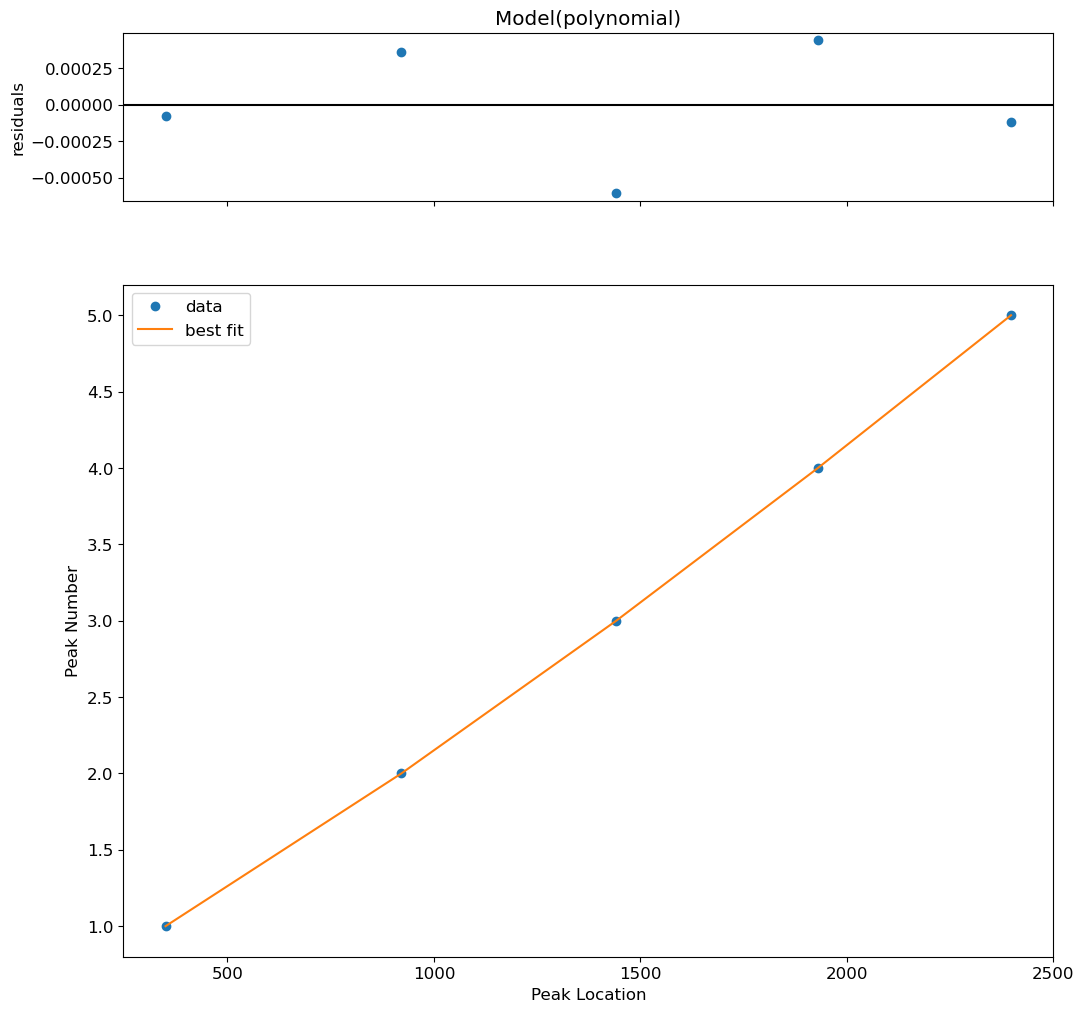

In [18]:
## Import the model
from lmfit.models import PolynomialModel

## set the model to make a 3rd-order ploynomial
curve = PolynomialModel(degree=3)

green313_curve = model_fit_and_plot(centrals, centrals_peaknum, model = curve,
                              xlabel = "Peak Location", ylabel = "Peak Number")

### Calibration function & Replot

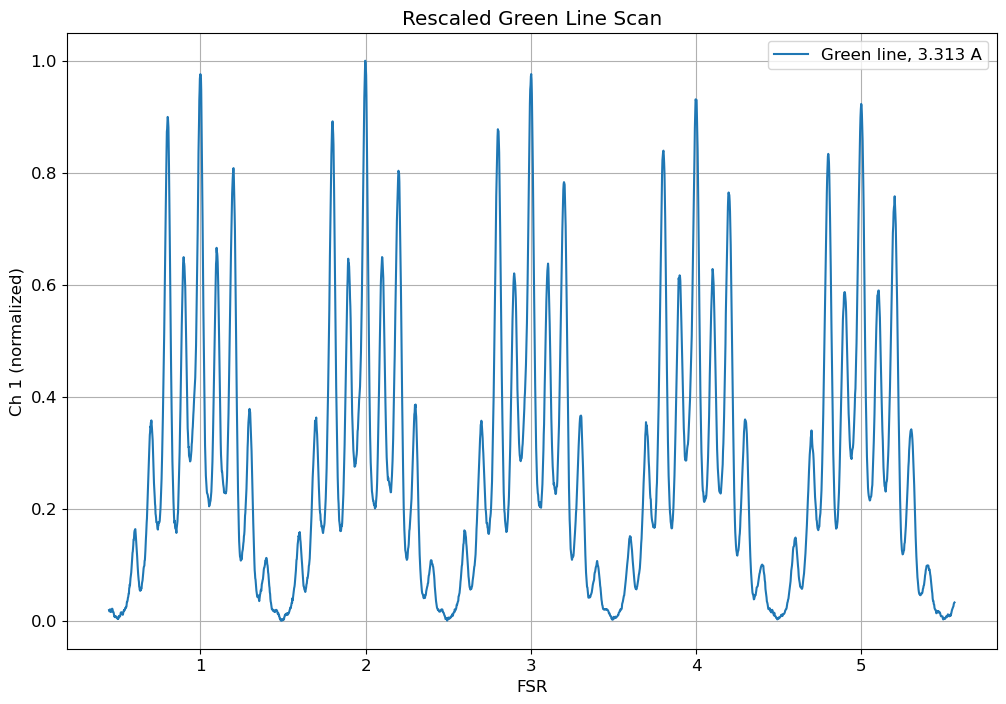

In [19]:
## Make the calibration function
def green_cal(x,model=curve,params=green313_curve):
        return model.eval(params, x=x)
  
## This array will reset the horizontal axis to units of FSR
x_0 = green_cal(np.arange(0, len(gr_B313_array)))

## Plot the data against the rescaled axis.
plt.title('Rescaled Green Line Scan')
plt.xlabel(r'FSR')
plt.ylabel(r'Ch 1 (normalized)')
plt.plot(x_0, gr_B313_array,'-', label='Green line, 3.313 A')
plt.legend() 
plt.grid(); 
plt.show()

### Make a table of peak locations

In [20]:
## Make a table and show it.

CH1_peaks = gr_B313_array[peaks_B313]

Green_scan_peaks = pd.DataFrame({'Peak Locations':green_cal(peaks_B313), "CH1 Normalized":green_cal(CH1_peaks)
 ## Complete the dataframe
})

Green_scan_peaks

,Peak Locations,CH1 Normalized
0,0.604698,0.447336
1,0.701669,0.447621
2,0.801785,0.448447
3,0.898588,0.448069
4,1.000080,0.448562
5,1.099685,0.448081
6,1.198938,0.448308
7,1.297746,0.447661
8,1.397758,0.447258
9,1.599528,0.447324


### Get average spacing

In [21]:
## You can save things to an array by initializing an array of the proper size, or by initializing an empty
## array and appending to it. 

pG = np.zeros(9)
pG_std = np.zeros(9)

## for loop goes over all peaks in a cluster
for i in range(0,9):
    pG[i] = np.mean((np.array(Green_scan_peaks.loc[i::9,"Peak Locations"]) - np.array(Green_scan_peaks.loc[4::9,"Peak Locations"])))
    pG_std[i] = np.std((np.array(Green_scan_peaks.loc[i::9,"Peak Locations"]) - np.array(Green_scan_peaks.loc[4::9,"Peak Locations"])))

## Make a DataFrame and show it
Green_peaks = pd.DataFrame({'Shift (FSR)':up.uarray(pG,pG_std)},index=range(-4,5))
Green_peaks

,Shift (FSR)
-4,-0.3983+/-0.0018
-3,-0.2998+/-0.0008
-2,-0.1987+/-0.0006
-1,-0.1004+/-0.0016
0,0.0+/-0
1,0.1014+/-0.0013
2,0.1998+/-0.0007
3,0.3002+/-0.0014
4,0.3997+/-0.0017


Add a column to the dataframe that converts to units of $\mu_BB$ using the conversion constant for green calculated earlier. 

Add a column that shows the expected shift in units of $\mu_BB$ so that they can be compared.

In [22]:
#Make function to calculate g factor
def g_factor(s, l, j):
    g = 1 + ((j*(j + 1) + s*(s+1) - l*(l+1))/(2*j*(j+1)))
    return g

s0,l0,j0 = 1,0,1
s_f,l_f,j_f = 1,1,2

#Calculate g factors using function
g0 = g_factor(s0, l0, j0)
g_f = g_factor(s_f, l_f, j_f)

print("Initial g = {}".format(g0))
print("Initial g = {}".format(g_f))

def theory_shift(m0, m_f, g0=g0, g_f=g_f):
    deltaE = g0*m0 - g_f*m_f
    return deltaE

m = pd.DataFrame({"Initial":[1,1,1,0,0,0,-1,-1,-1],"Final":[2,1,0,1,0,-1,0,-1,-2]}, index = range(-4,5))

Green_peaks['Shift (B*mu)']=conv_fact_green*Green_peaks["Shift (FSR)"]
Green_peaks['Theory (B*mu)']=np.sort(theory_shift(m["Initial"],m["Final"]))
Green_peaks

Initial g = 2.0
Initial g = 1.5


,Shift (FSR),Shift (B*mu),Theory (B*mu)
-4,-0.3983+/-0.0018,-1.631+/-0.017,-2.0
-3,-0.2998+/-0.0008,-1.228+/-0.012,-1.5
-2,-0.1987+/-0.0006,-0.813+/-0.008,-1.0
-1,-0.1004+/-0.0016,-0.411+/-0.008,-0.5
0,0.0+/-0,0.0+/-0,0.0
1,0.1014+/-0.0013,0.415+/-0.007,0.5
2,0.1998+/-0.0007,0.818+/-0.008,1.0
3,0.3002+/-0.0014,1.229+/-0.013,1.5
4,0.3997+/-0.0017,1.637+/-0.017,2.0


## Analysis of Yellow Lines


In [23]:
Yellow_B0 = pd.read_csv('yellow_mag0_noP.csv', skiprows=15, index_col = 0) 
Yellow_B13 = pd.read_csv('yellow_mag1.300_noP.csv', skiprows=15, index_col = 0) 

### Trim, normalize and plot


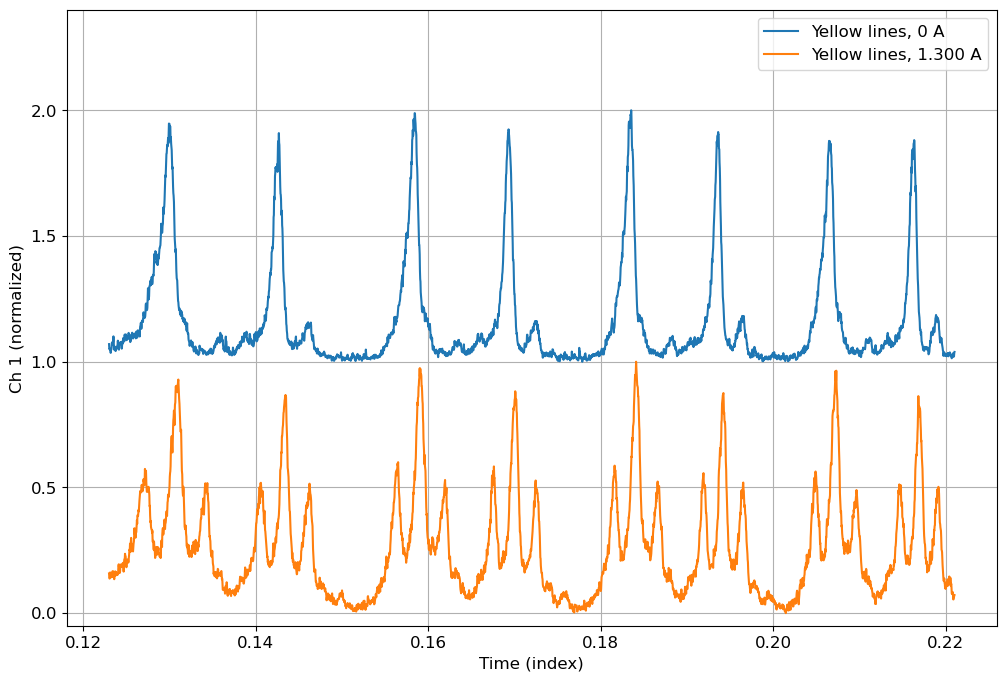

In [24]:
# Build normalized and trimmed data
# Slice found by eye with iteration on plot
# putting into new numpy array resets indices to start at zero

yel_0 = normalize_array(Yellow_B0.loc[0.123:0.221])
yel_B13 = normalize_array(Yellow_B13.loc[0.123:0.221])
                
# Offset and normalize-scale the data sets
plt.ylim(-0.05,2.4)
plt.xlabel(r'Time (index)')
plt.ylabel(r'Ch 1 (normalized)')
plt.plot(1.0+yel_0,'-', label='Yellow lines, 0 A')
plt.plot(yel_B13,'-', label='Yellow lines, 1.300 A')
plt.legend() 
plt.grid()
plt.show();

### Find the peaks

Work only on the $I\ne0$ data. Locate the peaks, and plot the data with markers to make sure you have the correct ones. You should have 3 times the number of peaks you had in the $I=0$ scan.

Peak  Loc   Width   Height
  1   131    45.2    0.55
  2   250    46.2    0.92
  3   353    29.6    0.50
  4   550    32.2    0.52
  5   638    34.9    0.87
  6   727    30.7    0.50
  7  1045    25.7    0.60
  8  1127    44.4    0.97
  9  1217    24.2    0.53
 10  1393    22.6    0.54
 11  1472    34.2    0.88
 12  1546    24.1    0.50
 13  1832    24.5    0.56
 14  1909    38.0    1.00
 15  1987    23.8    0.52
 16  2152    22.3    0.55
 17  2224    31.0    0.87
 18  2296    24.2    0.52
 19  2559    25.0    0.56
 20  2632    36.8    0.92
 21  2707    21.6    0.49
 22  2864    23.4    0.47
 23  2933    31.8    0.79
 24  3003    22.7    0.50


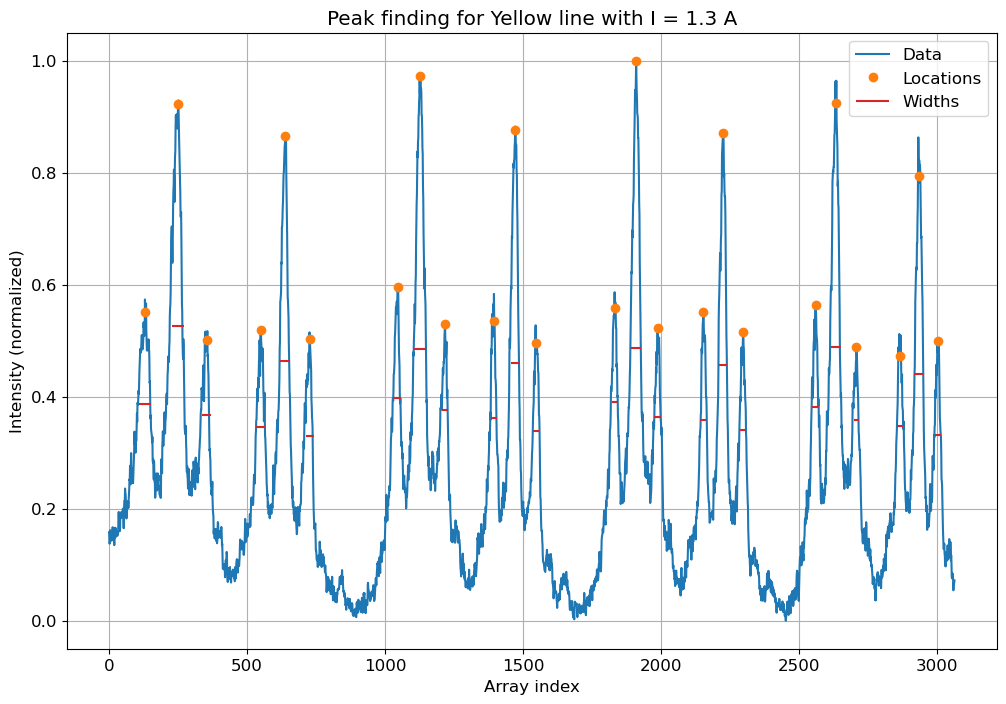

In [25]:
## Call the peak finding routine.  

yel_B13_array = yel_B13.values.flatten()

peaks_B13,widths_B13 = find_and_plot_peaks(yel_B13_array, min_width=10,
                                   min_dist=10, rel_prom = 0.05, title='Yellow line with I = 1.3 A')

## Separate the two yellow series

Because the yellow-lines scan contains two different wavelengths, you need to separate the peaks associated with 577 nm from the peaks associated with 579 nm.  One way to do this is by creating index lists to separate the two groups of peaks.  The 579 nm peaks are split from the central peak that is followed by a small side peak; the 577 nm peaks come from the other set.  To create the index lists, it is easiest to just write them by hand.  For example, for the 577 nm series, the central peaks are at indices 1, 7, 13, and 19 in the `peaks` array, and the side peaks are 1 up and 1 down from these.

Then use these indices to separate the peaks array into two independent sets.  These can then be analyzed in a manner identical to what was done with the green lines.  For each group:
* Locate the cental peaks for each with a slice, except skip by 3 rather than 9, and start at 1 rather than 4.
* Fit the central peaks to a polynomial curve and make a calibration function.
* Plot the data set to x-values determined by the calibration function to make sure it's right.
* Make a table of peak locations in units of FSR
* Calculate differences of the side peaks from the central peaks, and average across the scan.
* Rescale those differences in units of $\mu_BB$
* Make a table that shows the rescaled differences along side the values expected from theory.

In [26]:
## Make the index arrays for the central peaks for the two series

idx577 = np.array([0,1,2,6,7,8,12,13,14,18,19,20])
idx579 = idx577 + 3 

## Make two arrays of peak locations, one for 577 nm and one for 579 nm
peaks577 = peaks_B13[idx577]
peaks579 = peaks_B13[idx579]

print('577 nm peaks at ',peaks577)
print('579 nm peaks at ',peaks579)


577 nm peaks at  [ 131  250  353 1045 1127 1217 1832 1909 1987 2559 2632 2707]
579 nm peaks at  [ 550  638  727 1393 1472 1546 2152 2224 2296 2864 2933 3003]


## Analysis for 577 nm Yellow lines

### Get conversion calibration

Location of central peaks in each cluster:  [ 250 1127 1909 2632]
[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 4
    # variables        = 4
    chi-square         = 3.9443e-31
    reduced chi-square = 3.9443e-31
    Akaike info crit   = -277.576638
    Bayesian info crit = -280.031461
    R-squared          = 1.00000000
[[Variables]]
    c0:  0.74165973 +/- 1.3787e-15 (0.00%) (init = 0.7416597)
    c1:  0.00100798 +/- 4.9763e-18 (0.00%) (init = 0.001007975)
    c2:  1.0303e-07 +/- 4.1705e-21 (0.00%) (init = 1.030297e-07)
    c3: -5.9442e-12 +/- 9.5400e-25 (0.00%) (init = -5.944222e-12)


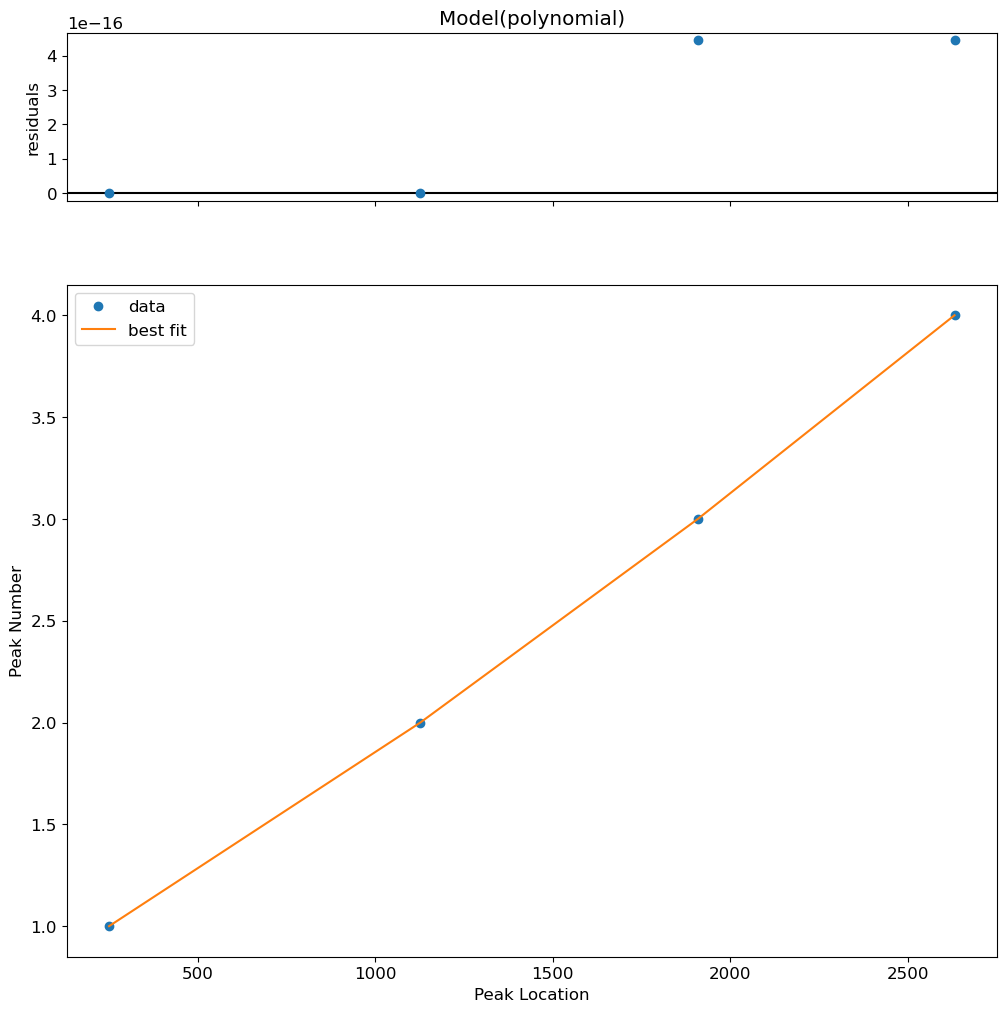

In [27]:
## Locate central peaks

centrals577 = peaks577[1::3]
centrals577_peaknum = np.arange(1,5)
## Fit to polynomial

print('Location of central peaks in each cluster: ', centrals577)

yel577_curve = model_fit_and_plot(centrals577, centrals577_peaknum, model = curve,
                              xlabel = "Peak Location", ylabel = "Peak Number")

### Make a calibration function


In [28]:
def yel577_cal(x,model=curve,params=yel577_curve):
        return model.eval(params, x=x)

## This array will reset the horizontal axis to units of FSR
x_yel = yel577_cal(np.arange(0, len(yel_B13_array)))

# Plot
plt.title('Rescaled Yellow577 Line Scan')
plt.xlabel(r'FSR')
plt.ylabel(r'Ch 1 (normalized)')
plt.plot(x_yel, yel_B13_array,'-', label='Yellow line, 1.3 A')
plt.legend() 
plt.grid()
plt.show; 

### Print a table
In units of FSR.

In [29]:
## Useful to make a DataFame for display

yel577_CH1_peaks = yel_B13_array[peaks577]

Yellow577_scan_peaks = pd.DataFrame({'Peak Locations':yel577_cal(peaks577), "CH1 Normalized":green_cal(yel577_CH1_peaks)
   # Complete
})

print('Locations of 577 nm peaks:')
Yellow577_scan_peaks

Locations of 577 nm peaks:


,Peak Locations,CH1 Normalized
0,0.875459,0.447923
1,1.000000,0.448483
2,1.110052,0.447847
3,1.900721,0.447989
4,2.000000,0.448557
5,2.110247,0.447889
6,2.897512,0.447932
7,3.000000,0.448599
8,3.104653,0.447879
9,3.896146,0.447940


### Calculate differences and average

In [30]:
## Need only 3 elements in the average arrays

#Initialize
y577 = np.zeros(3)
y577_std = np.zeros(3)

for i in range(0,3):
    y577[i] = np.mean((np.array(Yellow577_scan_peaks.loc[i::3,"Peak Locations"]) - np.array(Yellow577_scan_peaks.loc[1::3,"Peak Locations"])))
    y577_std[i] = np.std((np.array(Yellow577_scan_peaks.loc[i::3,"Peak Locations"]) - np.array(Yellow577_scan_peaks.loc[1::3,"Peak Locations"])))

## Build uncertainty arrays (optional)
Yellow577_peaks = pd.DataFrame({'Shift (FSR)':up.uarray(y577,y577_std)},index=range(-1,2))
Yellow577_peaks


## Convert to mu*B units
Yellow577_peaks['Energy (B*mu)']=conv_fact_yellow*Yellow577_peaks

#Theory
s0,l0,j0 = 1,2,2
s_f,l_f,j_f = 0,1,1

y577_g0 = g_factor(s0, l0, j0)
y577_g_f = g_factor(s_f, l_f, j_f)

print("g0 =", y577_g0)
print("g_f =", y577_g_f)

y577_m = pd.DataFrame({"Initial":[2,1,1,0,0,0,-1,-1,2],"Final":[1,1,0,1,0,-1,0,-1,-1]}, index = range(-4,5))

y577theory = np.sort(theory_shift(y577_m["Initial"],y577_m["Final"], g0=y577_g0, g_f=y577_g_f))

## Add in theory predictions 
Yellow577_peaks['Theory (B*mu)'] = y577theory[1:8:3]

print('Averaged locations of 577 nm peaks:')
Yellow577_peaks

g0 = 1.1666666666666667
g_f = 1.0
Averaged locations of 577 nm peaks:


,Shift (FSR),Energy (B*mu),Theory (B*mu)
-1,-0.108+/-0.010,-1.07+/-0.10,-1.000000
0,0.0+/-0,0.0+/-0,0.166667
1,0.1081+/-0.0023,1.074+/-0.023,1.333333


## Analysis for 579 nm Yellow lines

### Get conversion calibration

Fit the central peaks for the 579 nm part of the scan to get the coefficients to convert peak locations to FSR units, as was done for the green lines.

Location of central peaks in each cluster:  [ 638 1472 2224 2933]
[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 6
    # data points      = 4
    # variables        = 4
    chi-square         = 4.9304e-32
    reduced chi-square = 4.9304e-32
    Akaike info crit   = -285.894405
    Bayesian info crit = -288.349227
    R-squared          = 1.00000000
[[Variables]]
    c0:  0.33721932 +/- 1.4393e-15 (0.00%) (init = 0.3372193)
    c1:  9.5826e-04 +/- 3.2405e-18 (0.00%) (init = 0.0009582616)
    c2:  1.3387e-07 +/- 2.0309e-21 (0.00%) (init = 1.338717e-07)
    c3: -1.1868e-11 +/- 3.7650e-25 (0.00%) (init = -1.186752e-11)


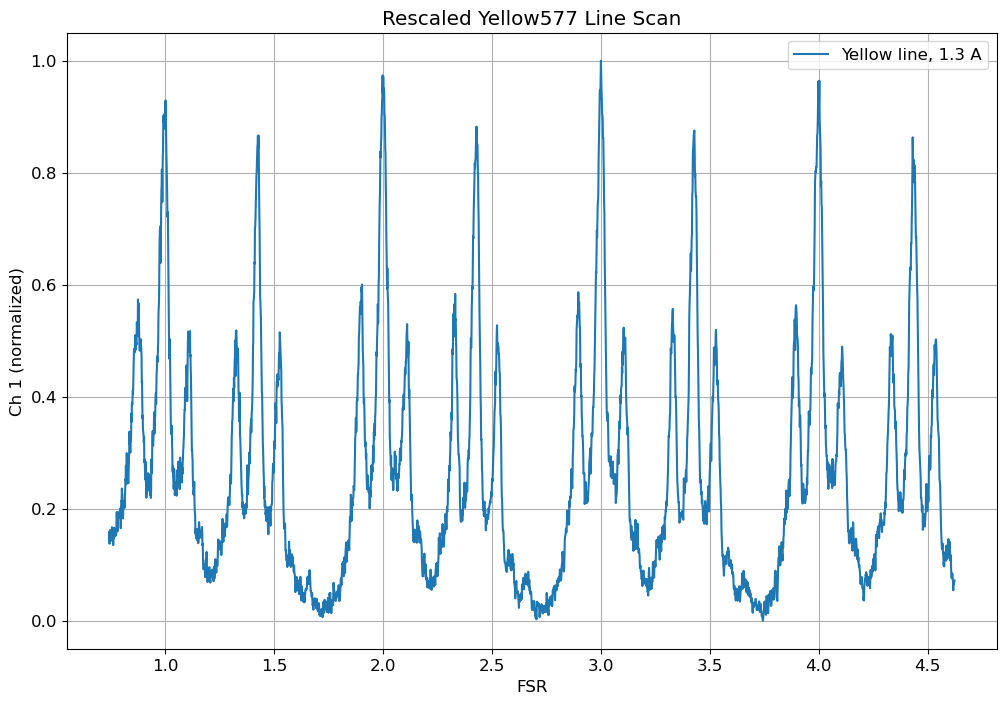

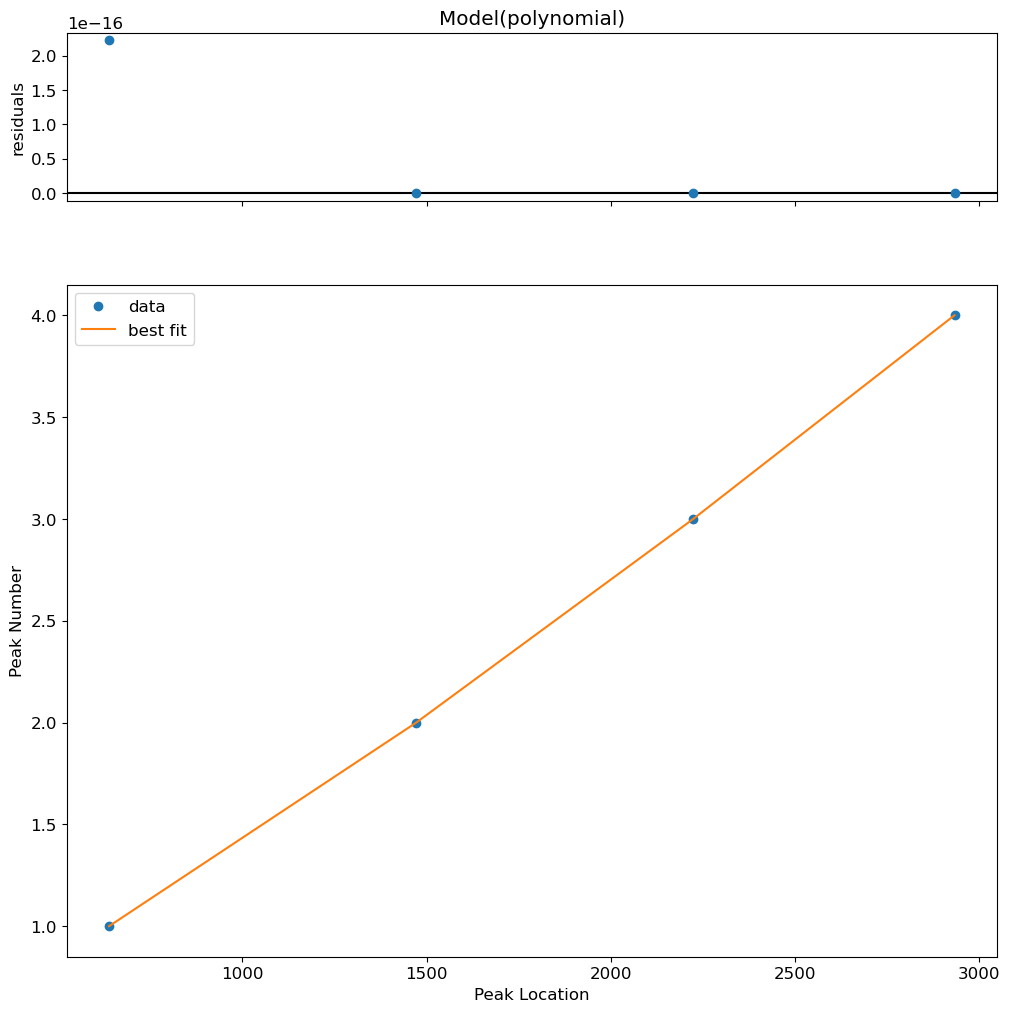

In [31]:
## Select central peaks (start at 1 and skip by 3)

centrals579 = peaks579[1::3]
centrals579_peaknum = np.arange(1,5)

print('Location of central peaks in each cluster: ', centrals579)

yel579_curve = model_fit_and_plot(centrals579, centrals579_peaknum, model = curve,
                              xlabel = "Peak Location", ylabel = "Peak Number")

### Make a calibration function

And then plot the original data against the x-values using the calibration.  **Now, You should see the 579 centers at evenly spaced values of the free spectral range.**

In [32]:
## Define the calibration function

def yel579_cal(x,model=curve,params=yel579_curve):
    return model.eval(params, x=x)

## Make an x-value array from the calibration function.  
## This array will reset the horizontal axis to units of FSR
x_yel579 = yel579_cal(np.arange(0, len(yel_B13_array)))

# Plot
plt.title('Rescaled Yellow579 Line Scan')
plt.xlabel(r'FSR')
plt.ylabel(r'Ch 1 (normalized)')
plt.plot(x_yel579, yel_B13_array,'-', label='Yellow579 line, 1.3 A')
plt.legend() 
plt.grid(); 

### Print a table

Show the **579 nm peak locations** in units of FSR

In [33]:
## Useful to make a DataFame for display

yel579_CH1_peaks = yel_B13_array[peaks579]

Yellow579_scan_peaks = pd.DataFrame({'Peak Locations':yel577_cal(peaks579), "CH1 Normalized":green_cal(yel579_CH1_peaks)

})

print('Locations of 579 nm peaks:')
Yellow579_scan_peaks

Locations of 579 nm peaks:


,Peak Locations,CH1 Normalized
0,1.326224,0.447872
1,1.425142,0.448396
2,1.526628,0.447849
3,2.329626,0.447898
4,2.429683,0.448413
5,2.524278,0.447838
6,3.328723,0.447920
7,3.427611,0.448403
8,3.527157,0.447868
9,4.333960,0.447803


### Calculate differences and average

Repeat what was done for the 577 nm group above.

In [34]:
## Copy above and modify as needed
y579 = np.zeros(3)
y579_std = np.zeros(3)

for i in range(0,3):
    y579[i] = np.mean((np.array(Yellow579_scan_peaks.loc[i::3,"Peak Locations"]) - np.array(Yellow579_scan_peaks.loc[1::3,"Peak Locations"])))
    y579_std[i] = np.std((np.array(Yellow579_scan_peaks.loc[i::3,"Peak Locations"]) - np.array(Yellow579_scan_peaks.loc[1::3,"Peak Locations"])))

## Build uncertainty arrays (optional)
Yellow579_peaks = pd.DataFrame({'Shift (FSR)':up.uarray(y579,y579_std)},index=range(-1,2))
Yellow579_peaks


## Convert to mu*B units
Yellow579_peaks['Energy (B*mu)']=conv_fact_yellow*Yellow579_peaks

#Theory
s0,l0,j0 = 0,2,2
s_f,l_f,j_f = 0,1,1

y579_g0 = g_factor(s0, l0, j0)
y579_g_f = g_factor(s_f, l_f, j_f)

print("g0 =", y579_g0)
print("g_f =", y579_g_f)

y579_m = pd.DataFrame({"Initial":[2,1,1,0,0,0,-1,-1,-2],"Final":[1,1,0,1,0,-1,0,-1,-1]}, index = range(-4,5))
y579theory = np.sort(theory_shift(y579_m["Initial"],y579_m["Final"], g0=y579_g0, g_f = y579_g_f))

## Add in theory predictions 
Yellow579_peaks['Theory (B*mu)'] = y579theory[1:8:3]

print('Averaged locations of 579 nm peaks:')
Yellow579_peaks

g0 = 1.0
g_f = 1.0
Averaged locations of 579 nm peaks:


,Shift (FSR),Energy (B*mu),Theory (B*mu)
-1,-0.0996+/-0.0007,-0.990+/-0.007,-1.0
0,0.0+/-0,0.0+/-0,0.0
1,0.0995+/-0.0030,0.989+/-0.030,1.0
